#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
boston = load_boston()

In [60]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [62]:
X = boston['data']
y = boston['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
sc = StandardScaler()

In [65]:
X_tr_scaled = sc.fit_transform(X_train)

In [66]:
ts = TSNE(n_components= 2, learning_rate=250, random_state=42)

In [67]:
X_tr_ts = ts.fit_transform(X_tr_scaled)

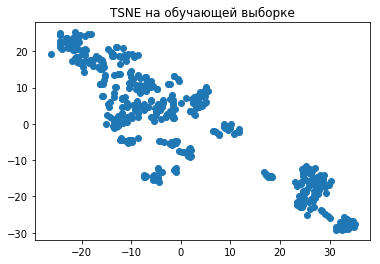

In [68]:
plt.scatter(X_tr_ts[:, 0], X_tr_ts[:, 1])
plt.title('TSNE на обучающей выборке');

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [71]:
# используем не X_train, a отнормированный X_tr_scaled
y_tr_pred = km.fit_predict(X_tr_scaled)

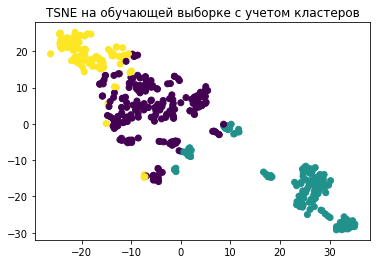

In [72]:
plt.scatter(X_tr_ts[:, 0], X_tr_ts[:, 1], c = y_tr_pred)
plt.title('TSNE на обучающей выборке с учетом кластеров');

In [73]:
X_in = pd.DataFrame(X_train, columns=boston['feature_names'])

In [74]:
X_in.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83


In [77]:
X_in = X_in.join(pd.DataFrame(data = y_tr_pred, columns= ['cluster']))
X_in = X_in.join(pd.DataFrame(data = y_train, columns= ['price'])) 

In [80]:
X_in.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster,price
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,0,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,2,19.4


In [86]:
X_out = (X_in.groupby(by = 'cluster')['CRIM','price'].mean()).reset_index()
X_out.columns = ['cluster', 'avg_CRIM','avg_price']
X_out

,cluster,avg_CRIM,avg_price
0,0,0.420986,24.971204
1,1,10.637094,16.179688
2,2,0.072118,27.874118


#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [88]:
X_test_scaled = sc.transform(X_test)

In [89]:
y_test_cl = km.predict(X_test_scaled)

In [90]:
y_test_cl

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [97]:
X_test_in  = pd.DataFrame(X_test, columns=boston['feature_names'])
X_test_in = X_test_in.join(pd.DataFrame(data = y_test_cl, columns= ['cluster']))
X_test_in = X_test_in.join(pd.DataFrame(data = y_test, columns= ['price'])) 
X_test_out = (X_test_in.groupby(by = 'cluster')['CRIM','price'].mean()).reset_index()
X_test_out.columns = ['cluster', 'avg_CRIM','avg_price']
X_test_out

,cluster,avg_CRIM,avg_price
0,0,0.266079,21.860784
1,1,10.165531,16.437143
2,2,0.062060,31.350000
